# model_XGBoost_regression

In [75]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np

## IMPORT

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [96]:
file_path='../DATA/final_DATA.csv'
df = pd.read_csv(file_path, encoding='utf-8', sep=';', index_col=0, low_memory=False)
df.shape

(33803, 180)

In [97]:
file_path='../DATA/final_4first_col.csv'
df_info = pd.read_csv(file_path, encoding='utf-8', sep=';', index_col=0, low_memory=False)
df_info.shape


(33803, 4)

In [98]:
df_info.head(5)

,dep,nomdep,codecommune,nomcommune
key,,,,
01001,01,AIN,01001,L'ABERGEMENT-CLÉMENCIAT
01002,01,AIN,01002,L'ABERGEMENT-DE-VAREY
01004,01,AIN,01004,AMBÉRIEU-EN-BUGEY
01005,01,AIN,01005,AMBÉRIEUX-EN-DOMBES
01006,01,AIN,01006,AMBLÉON


In [99]:
df.head()

,TAR_inscrits,TAR_votants,TAR_exprimes,YYY_pvoixAUG,YYY_pvoixNUP,YYY_pvoixDVG,YYY_pvoixECO,YYY_pvoixREG,YYY_pvoixENS,YYY_pvoixUDI,...,TER_surf68,NAT_petranger22,NAT_pimmigre22,NAT_pimmnatur22,NAT_pnatur22,NAT_petranger12,NAT_pimmigre12,NAT_pimmnatur12,NAT_petranger02,NAT_petranger92
0,644.0,343.0,339.0,0.011799,0.153392,0.047198,0.023599,0.000000,0.147493,0.097345,...,0.0,0.005161,0.014194,0.009032,0.014194,0.025740,0.037323,0.011583,0.018543,0.014634
1,218.0,133.0,128.0,0.031250,0.343750,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.003891,0.003891,0.000000,0.000000,0.012766,0.021277,0.008511,0.005618,0.037736
2,8844.0,4123.0,4012.0,0.016451,0.298106,0.008225,0.000000,0.013958,0.000000,0.000000,...,0.0,0.089823,0.107816,0.017993,0.027062,0.079042,0.102438,0.023396,0.066773,0.060427
3,1299.0,636.0,622.0,0.008039,0.160772,0.038585,0.024116,0.000000,0.178457,0.093248,...,0.0,0.013349,0.041788,0.028439,0.042948,0.014007,0.036541,0.022533,0.026063,0.043729
4,101.0,63.0,59.0,0.050847,0.220339,0.000000,0.000000,0.000000,0.288136,0.000000,...,0.0,0.044643,0.044643,0.000000,0.000000,0.090909,0.100000,0.009091,0.000000,0.000000


### Fusion 

In [100]:
df_FULL = df.copy()
df_FULL.shape

(33803, 180)

In [101]:
df_FULL.index = df_info.index 
df_FULL.head(2)

,TAR_inscrits,TAR_votants,TAR_exprimes,YYY_pvoixAUG,YYY_pvoixNUP,YYY_pvoixDVG,YYY_pvoixECO,YYY_pvoixREG,YYY_pvoixENS,YYY_pvoixUDI,...,TER_surf68,NAT_petranger22,NAT_pimmigre22,NAT_pimmnatur22,NAT_pnatur22,NAT_petranger12,NAT_pimmigre12,NAT_pimmnatur12,NAT_petranger02,NAT_petranger92
key,,,,,,,,,,,,,,,,,,,,,
01001,644.0,343.0,339.0,0.011799,0.153392,0.047198,0.023599,0.0,0.147493,0.097345,...,0.0,0.005161,0.014194,0.009032,0.014194,0.025740,0.037323,0.011583,0.018543,0.014634
01002,218.0,133.0,128.0,0.031250,0.343750,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.003891,0.003891,0.000000,0.000000,0.012766,0.021277,0.008511,0.005618,0.037736


In [102]:
# result = pd.concat([df1, df2], axis=0, ignore_index=True)
df_FULL = pd.concat([df_FULL, df_info], axis=1)
df_FULL.shape

(33803, 184)

In [103]:
df_FULL.head(5)

,TAR_inscrits,TAR_votants,TAR_exprimes,YYY_pvoixAUG,YYY_pvoixNUP,YYY_pvoixDVG,YYY_pvoixECO,YYY_pvoixREG,YYY_pvoixENS,YYY_pvoixUDI,...,NAT_pnatur22,NAT_petranger12,NAT_pimmigre12,NAT_pimmnatur12,NAT_petranger02,NAT_petranger92,dep,nomdep,codecommune,nomcommune
key,,,,,,,,,,,,,,,,,,,,,
01001,644.0,343.0,339.0,0.011799,0.153392,0.047198,0.023599,0.000000,0.147493,0.097345,...,0.014194,0.025740,0.037323,0.011583,0.018543,0.014634,01,AIN,01001,L'ABERGEMENT-CLÉMENCIAT
01002,218.0,133.0,128.0,0.031250,0.343750,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.012766,0.021277,0.008511,0.005618,0.037736,01,AIN,01002,L'ABERGEMENT-DE-VAREY
01004,8844.0,4123.0,4012.0,0.016451,0.298106,0.008225,0.000000,0.013958,0.000000,0.000000,...,0.027062,0.079042,0.102438,0.023396,0.066773,0.060427,01,AIN,01004,AMBÉRIEU-EN-BUGEY
01005,1299.0,636.0,622.0,0.008039,0.160772,0.038585,0.024116,0.000000,0.178457,0.093248,...,0.042948,0.014007,0.036541,0.022533,0.026063,0.043729,01,AIN,01005,AMBÉRIEUX-EN-DOMBES
01006,101.0,63.0,59.0,0.050847,0.220339,0.000000,0.000000,0.000000,0.288136,0.000000,...,0.000000,0.090909,0.100000,0.009091,0.000000,0.000000,01,AIN,01006,AMBLÉON


### FILTRES

In [104]:
# Specify the file path
file_path = '../DATA/list_codecommune_leg2022_50inscrits.txt'

# Open the text file and read lines into a list
with open(file_path, 'r', encoding='utf-8') as file:
    lines = [line.strip() for line in file.readlines()]

# Print or manipulate the list of lines as needed
print(lines[0:10], len(lines))

['01001', '01002', '01004', '01005', '01006', '01007', '01008', '01009', '01010', '01011'] 33830


In [105]:
index_suppr = ['13201','13202','13203','13204','13205','13206','13207','13208','13209','13210','13211','13212','13213','13214','13215','13216',
               '69380','69381','69382','69383','69384','69385','69386','69387','69388','69389','75056']


In [106]:
linesC = list(set(lines) - set(index_suppr))
len (linesC)

33803

In [107]:
df_filtered = df_FULL[df_FULL['codecommune'].isin(linesC)]
df_filtered.shape,df_FULL.shape

((33803, 184), (33803, 184))

# SLPIT

In [113]:
df_infoC = df_filtered.iloc[:, -4:] 
df_infoC.shape

(33803, 4)

In [114]:
df_XY = df_filtered.iloc[:, 0:-4] 
df_XY.shape

(33803, 180)

In [115]:
# SPLIT
y = df_XY.filter(like='YYY', axis=1)
# Filter columns NOT starting with 'YYY'
X = df_XY.loc[:, ~df.columns.str.startswith('YYY')]
X.shape, y.shape

((33803, 169), (33803, 11))

In [116]:
titr_cols_list = X.columns.tolist()
titr_cols_list[0]

'TAR_inscrits'

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print('X_train shape : ', X_train.shape)
print('X_test shape : ', X_test.shape)
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)

X_train shape :  (30422, 169)
X_test shape :  (3381, 169)
y_train shape :  (30422, 11)
y_test shape :  (3381, 11)


### StandardScaler

In [118]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [119]:
set(y)

{'YYY_pvoixAUG',
 'YYY_pvoixDVD',
 'YYY_pvoixDVG',
 'YYY_pvoixECO',
 'YYY_pvoixENS',
 'YYY_pvoixLR',
 'YYY_pvoixNUP',
 'YYY_pvoixREC',
 'YYY_pvoixREG',
 'YYY_pvoixRN',
 'YYY_pvoixUDI'}

In [120]:
y

,YYY_pvoixAUG,YYY_pvoixNUP,YYY_pvoixDVG,YYY_pvoixECO,YYY_pvoixREG,YYY_pvoixENS,YYY_pvoixUDI,YYY_pvoixLR,YYY_pvoixDVD,YYY_pvoixREC,YYY_pvoixRN
key,,,,,,,,,,,
01001,0.011799,0.153392,0.047198,0.023599,0.000000,0.147493,0.097345,0.174041,0.026549,0.061947,0.256637
01002,0.031250,0.343750,0.000000,0.000000,0.000000,0.000000,0.000000,0.109375,0.437500,0.015625,0.062500
01004,0.016451,0.298106,0.008225,0.000000,0.013958,0.000000,0.000000,0.087488,0.312812,0.057079,0.205882
01005,0.008039,0.160772,0.038585,0.024116,0.000000,0.178457,0.093248,0.110932,0.009646,0.059486,0.316720
01006,0.050847,0.220339,0.000000,0.000000,0.000000,0.288136,0.000000,0.288136,0.000000,0.016949,0.135593
...,...,...,...,...,...,...,...,...,...,...,...
95676,0.017544,0.140351,0.000000,0.087719,0.000000,0.232456,0.000000,0.166667,0.026316,0.092105,0.236842
95678,0.008403,0.184874,0.011204,0.047619,0.022409,0.282913,0.000000,0.131653,0.014006,0.064426,0.232493
95680,0.008571,0.460476,0.105476,0.010000,0.015476,0.235714,0.031667,0.000000,0.000000,0.022857,0.109762


## xgboost as xgb verion 0

In [123]:
model = xgb.XGBRegressor(objective='reg:squarederror')

# Train the model separately for each dimension of y
for i in range(y_train.shape[1]):
    model.fit(X_train, y_train.iloc[:, i])
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test.iloc[:, i], y_pred)
    print(f"Mean Squared Error for y{i+1}: {mse:.6f}")

Mean Squared Error for y1: 0.000166
Mean Squared Error for y2: 0.005610
Mean Squared Error for y3: 0.002537
Mean Squared Error for y4: 0.000348
Mean Squared Error for y5: 0.001100
Mean Squared Error for y6: 0.006538
Mean Squared Error for y7: 0.001184
Mean Squared Error for y8: 0.008721
Mean Squared Error for y9: 0.003891
Mean Squared Error for y10: 0.000666
Mean Squared Error for y11: 0.004826


## xgboost as xgb verion 1

In [127]:
# import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
# fitting
multioutputregressor = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror')).fit(X_train_scaled, y_train)

In [128]:
# predicting
print(np.mean((multioutputregressor.predict(X_test_scaled ) - y_test)**2, axis=0))

YYY_pvoixAUG    0.000166
YYY_pvoixNUP    0.005657
YYY_pvoixDVG    0.002504
YYY_pvoixECO    0.000341
YYY_pvoixREG    0.001087
YYY_pvoixENS    0.006543
YYY_pvoixUDI    0.001184
YYY_pvoixLR     0.008724
YYY_pvoixDVD    0.003891
YYY_pvoixREC    0.000666
YYY_pvoixRN     0.004829
dtype: float64


In [130]:
pred0 = multioutputregressor.predict([X_test_scaled[0]]) 
pred0.shape

(1, 11)

In [165]:
y_test.iloc[0]

YYY_pvoixAUG    0.009592
YYY_pvoixNUP    0.294964
YYY_pvoixDVG    0.000000
YYY_pvoixECO    0.000000
YYY_pvoixREG    0.000000
YYY_pvoixENS    0.395683
YYY_pvoixUDI    0.000000
YYY_pvoixLR     0.088729
YYY_pvoixDVD    0.000000
YYY_pvoixREC    0.040767
YYY_pvoixRN     0.170264
Name: 39177, dtype: float64

In [167]:
target_title=[]
for c in y_test : 
    target_title.append(c[9:])
target_title  

['AUG', 'NUP', 'DVG', 'ECO', 'REG', 'ENS', 'UDI', 'LR', 'DVD', 'REC', 'RN']

In [171]:
import random 
x = np.random.randint(len(y_test))
print ('X:',x)
print (df_infoC.iloc[x])
pred = multioutputregressor.predict([X_test_scaled[x]]) 
for i in range (len(pred[0])) :
    print (target_title[i] , ':', pred[0][i], '>', y_test.iloc[x,i] ,' >>> ', pred[0][i] - y_test.iloc[x,i],' >>> ', (pred[0][i] - y_test.iloc[x,i])/pred[0][i])

X: 1475
dep                                 04
nomdep         ALPES-DE-HAUTE-PROVENCE
codecommune                      04013
nomcommune                   AUBIGNOSC
Name: 04013, dtype: object
AUG : 0.019658107 > 0.012948208  >>>  0.006709899310533524  >>>  0.3413298749741852
NUP : 0.28878126 > 0.27191234  >>>  0.016868915483627345  >>>  0.05841416353487577
DVG : 0.026710555 > 0.0  >>>  0.02671055495738983  >>>  1.0
ECO : 0.02362611 > 0.04681275  >>>  -0.023186640414834023  >>>  -0.9813990039812613
REG : 0.016958749 > 0.0  >>>  0.016958748921751976  >>>  1.0
ENS : 0.15867114 > 0.24601594  >>>  -0.08734479932922362  >>>  -0.5504769106718255
UDI : 0.0010576048 > 0.0  >>>  0.001057604793459177  >>>  1.0
LR : 0.050214782 > 0.0  >>>  0.05021478235721588  >>>  1.0
DVD : 0.033202764 > 0.070717134  >>>  -0.03751437035315895  >>>  -1.1298568622834537
REC : 0.037619688 > 0.048804782  >>>  -0.011185094383174894  >>>  -0.2973202355399796
RN : 0.29964826 > 0.30278885  >>>  -0.003140594890213011  >>> 

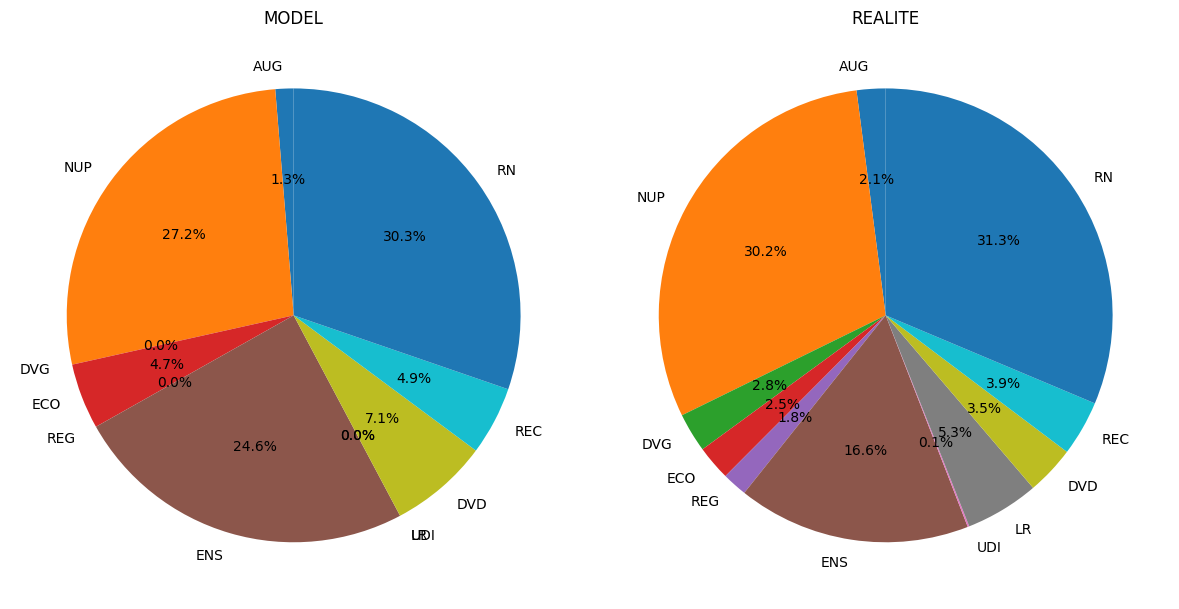

In [172]:
import matplotlib.pyplot as plt

values1 = y_test.iloc[x]
values2 = pred[0]
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first pie chart
axs[0].pie(values1, labels=target_title , autopct='%1.1f%%', startangle=90)
axs[0].set_title('MODEL')

# Plot the second pie chart
axs[1].pie(values2, labels=target_title , autopct='%1.1f%%', startangle=90)
axs[1].set_title('REALITE')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [147]:
feature_importances_target1 = multioutputregressor.estimators_[0].feature_importances_
arg_importances_target1 = multioutputregressor.estimators_[0].feature_importances_.argsort()[::-1][:10]
feature_importances_target2 = multioutputregressor.estimators_[1].feature_importances_
arg_importances_target1 = multioutputregressor.estimators_[1].feature_importances_.argsort()[::-1][:10]

In [29]:
feature_importances_target1.max(),feature_importances_target1.min()

(0.0138891665, 0.0)

In [30]:
arg_importances_target1, feature_importances_target1

(array([ 93,  32,  89,  27,  88, 135,  95, 147, 165,  98]),
 array([0.00246969, 0.00482557, 0.00779676, 0.00457637, 0.00788087,
        0.00407182, 0.00301046, 0.01029533, 0.00363317, 0.00559809,
        0.00448724, 0.00340748, 0.00270983, 0.00447869, 0.00473015,
        0.00585159, 0.00587648, 0.00486557, 0.00537816, 0.0046176 ,
        0.00420564, 0.00456455, 0.00505351, 0.00572109, 0.00620401,
        0.00537334, 0.00572823, 0.00541269, 0.0053479 , 0.00486672,
        0.00519859, 0.00376551, 0.00304091, 0.00676603, 0.0055177 ,
        0.00521203, 0.00544576, 0.00581332, 0.00439198, 0.00602599,
        0.00628504, 0.00585694, 0.00554956, 0.00629267, 0.00643094,
        0.00739308, 0.00408618, 0.00612746, 0.01026104, 0.00446481,
        0.00500153, 0.00496477, 0.00568664, 0.00475938, 0.00518042,
        0.00598802, 0.00647969, 0.00529708, 0.00434462, 0.00472525,
        0.00505065, 0.00850956, 0.0072604 , 0.00672032, 0.00614903,
        0.00544744, 0.00533441, 0.01368646, 0.00568049, 

In [35]:
titr_cols_list[113]

'KP1_capitalimmo12'

In [44]:

# Access feature importances for the first target
feature_importances_target1 = multioutputregressor.estimators_[0].feature_importances_

# Get the indices of the top 10 features for the first target
top_features_indices_target1 = feature_importances_target1.argsort()[::-1][:50]

# Create a DataFrame to store the results
top_features_df_target1 = pd.DataFrame({
    'Feature_Index': top_features_indices_target1,
    'Feature_Importance': feature_importances_target1[top_features_indices_target1]
})

top_features_df_target1['info'] = top_features_df_target1['Feature_Index'].apply(lambda x: titr_cols_list[x])

# Print the DataFrame with the top features for the first target
print("Top Features for Target1:")
print(top_features_df_target1)

Top Features for Target1:
    Feature_Index  Feature_Importance               info
0             113            0.013889  KP1_capitalimmo12
1              67            0.013686     AGE_prop014_02
2             154            0.012956        DIP_supf_02
3              89            0.010773    AGE_prop1539_92
4               7            0.010295       YYY_pvoixREG
5              48            0.010261    AGE_prop4059_12
6             105            0.009599       KP0_prim2_P1
7             150            0.009500         DIP_bac_02
8             156            0.009453        DIP_psup_02
9              88            0.009053     AGE_prop014_92
10            103            0.009001     KP0_SurfTer_P1
11            148            0.008711      DIP_nodipf_02
12             70            0.008673     AGE_prop60p_02
13            101            0.008673         KP0_Pri_P1
14             61            0.008510    AGE_popf4059_02
15            111            0.008495  KP1_capitalimmo22
16   

In [40]:
pred0

array([[ 1.2073030e-02,  2.0008838e-01,  9.6360259e-03,  1.6450570e-03,
        -2.7248161e-04,  2.7795851e-01,  1.4061260e-03,  1.9512649e-01,
         2.8967749e-02,  3.8176954e-02,  1.7173229e-01]], dtype=float32)

In [51]:
multioutputregressor.best_estimator_.feature_importances_

AttributeError: 'MultiOutputRegressor' object has no attribute 'best_estimator_'

In [19]:
# Create an XGBoost classifier
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y)))

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [    0     1     2 ... 62762 62763 62764], got [0.0000000e+00 4.5981240e-05 9.7314129e-05 ... 9.5973152e-01 9.7619045e-01
 1.0000000e+00]

In [20]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset as an example
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y)))

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [21]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])